In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
data = pd.read_csv("Desktop/LinearRegression_CarPrice.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
#### روش های تبدیل متغیرهای دسته ای به متغیر های عدی:

In [6]:
########## 1- Ordinal Encoding for Categorical Data:

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder1 = OrdinalEncoder()
data1 = data.copy()
data1['CarName'] = encoder1.fit_transform(data1[['CarName']])
data1['fueltype'] = encoder1.fit_transform(data1[['fueltype']])
data1['aspiration'] = encoder1.fit_transform(data1[['aspiration']])
data1['doornumber'] = encoder1.fit_transform(data1[['doornumber']])
data1['carbody'] = encoder1.fit_transform(data1[['carbody']])
data1['drivewheel'] = encoder1.fit_transform(data1[['drivewheel']])
data1['enginelocation'] = encoder1.fit_transform(data1[['enginelocation']])
data1['enginetype'] = encoder1.fit_transform(data1[['enginetype']])
data1['cylindernumber'] = encoder1.fit_transform(data1[['cylindernumber']])
data1['fuelsystem'] = encoder1.fit_transform(data1[['fuelsystem']])
data1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,141,5.0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,...,141,5.0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,173,5.0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,...,145,3.0,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
########## 2- One-Hot Encoding for Categorical Data:

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder(sparse=False)
data2 = data.copy()
data2['CarName'] = encoder2.fit_transform(data2[['CarName']])
data2['fueltype'] = encoder2.fit_transform(data2[['fueltype']])
data2['aspiration'] = encoder2.fit_transform(data2[['aspiration']])
data2['doornumber'] = encoder2.fit_transform(data2[['doornumber']])
data2['carbody'] = encoder2.fit_transform(data2[['carbody']])
data2['drivewheel'] = encoder2.fit_transform(data2[['drivewheel']])
data2['enginelocation'] = encoder2.fit_transform(data2[['enginelocation']])
data2['enginetype'] = encoder2.fit_transform(data2[['enginetype']])
data2['cylindernumber'] = encoder2.fit_transform(data2[['cylindernumber']])
data2['fuelsystem'] = encoder2.fit_transform(data2[['fuelsystem']])
data2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,88.6,...,130,0.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,88.6,...,130,0.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,94.5,...,152,0.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,99.8,...,109,0.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,99.4,...,136,0.0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,109.1,...,141,0.0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,109.1,...,141,0.0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,109.1,...,173,0.0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,109.1,...,145,0.0,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
####           ***********    1. رگرسیون خطی تک متغیره:  ***************

In [11]:
####### در این بحش تصمیم دارم قیمت خودرو را برحسب پارامتر نوع موتور آن حدس بزنم: 

In [12]:
data = data1

In [13]:
def computeCost(x,y,theta):
    m = len(y)  
    J = 0       
    J = (1/(2*m)) * (np.sum([np.power(np.dot(np.transpose(theta),x[i])-y[i],2) for i in range(m)]))
    return J

## این تابع، دو ارایه نظیر ورودی و خروحی و یک تتا را میگیرد. و تابع هزینه ی یک مدل رگرسیون خطی را برای ما تولید می کند.

In [14]:
data_n = data.values
m = data_n[:,0].size
x = np.append(np.ones((m,1)), data_n[:,14].reshape(m,1), axis=1)
y = data_n[:,25].reshape(m,1)

## settiing parameters

In [15]:
theta = np.zeros((2, 1))
J = computeCost(x,y, theta)
J

## using generated parameters to generate cost func
## J is the cost value

119890739.74557047

In [16]:
theta_1 = np.array([-1, 2]).reshape((2,1))
J_1 = computeCost(x, y, theta_1);
J_1

## testing cost function again with anothe r

119823157.84393631

In [17]:
## Now we can use gradient descent algorithm to minimize cost function:

In [18]:
def gradientDescent(x,y,theta,alpha,num_iters):
    w = np.zeros((len(theta),1))
    m = len(y)
    J_history = []   #list of the cost of theta during each iteration
    for j in range(num_iters):
        for k in range(len(theta)):
            w[k]=((alpha)/m)* np.sum([(np.dot(np.transpose(theta),x[i])-y[i])*x[i][k] for i in range(m)])    
        theta = np.subtract(theta ,w )       
        J_history.append(computeCost(x,y, theta))
    return theta, J_history

##By calculating J, we can check the convergence of gradient descent 
## alpha is learning rate

In [19]:
theta, J_history = gradientDescent(x, y, theta, 0.01, 50)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1\n")
print('theta = ' + str(theta))

h(x) = 1632.46 + 3503.14x1

theta = [[1632.45949342]
 [3503.14378884]]


In [20]:
#### The plot of cost function:

In [21]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(x,y,t)
        
## Generating values for theta0 & theta1 & the cost value result

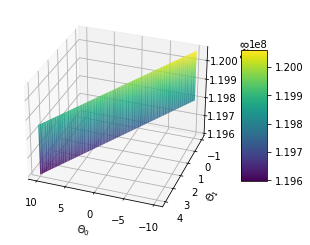

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
fig.colorbar(surf, shrink=0.6, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.view_init(30,110)

#Generating the plot
# z is cost function

In [23]:
## The plot of linear regression:

[[1632.45949342]
 [3503.14378884]]


Text(0.5, 1.0, 'Price Prediction')

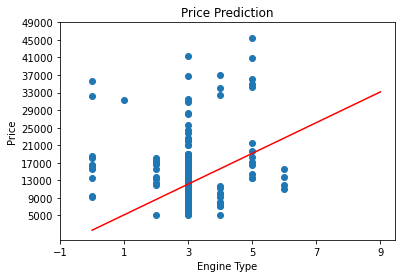

In [24]:
plt.scatter(data.iloc[:,14],data.iloc[:,25])
x_value=[i for i in range(10)]
print(theta)
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(-1,10,step=2))
plt.yticks(np.arange(5000,50000,step=4000))
plt.xlabel("Engine Type")
plt.ylabel("Price")
plt.title("Price Prediction")

In [25]:
## با این پیشبینی که به کمک رگرسیون خطی روی یک متغیر صورت گرفت، مدل بدست آمده دقت خوبی ندارد. و پیشبینی دقیقی را برای ما ایجاد نمی کند.

In [26]:
####           ***********    2. رگرسیون خطی چند متغیره:  ***************

In [27]:
## در وهله ی اول باید یک نرمال سازی روی متغیر های دیتاست انجام بدهیم:

In [28]:
def featureNormalization(X):
    m = len(X[0,:])
    mean=np.zeros((m,1))
    std=np.zeros((m,1))   #standard deviation
    
    for i in range(m):
        mean[i]=(np.mean(X[:,i]))
        std[i]=(np.std(X[:,i]))
        X[:,i]=((X[:,i]-mean[i])/std[i])
    return X, mean , std

#It returns normalize X values and the mean and standard deviation of each feature

In [29]:
## calculating cost function:

In [30]:
data2 = data.copy()
data2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,141,5.0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,...,141,5.0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,173,5.0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,...,145,3.0,3.01,3.40,23.0,106,4800,26,27,22470.0


In [38]:
data_n2 = data2.values
m2 = len(data_n2[:,-1])
X2 = data_n2[:,0:25].reshape(m2,25)
x4=X2
X2 = np.float32(X2)
X3=X2
X2, mean_X2, std_X2 = featureNormalization(X2)

#input data normalized

In [39]:
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2 = data_n2[:,-1].reshape(m2,1 )
theta2 = np.zeros((26,1))

In [40]:
J = computeCost(X2,y2,theta2)
J

# cost function computed

119890739.74557047

In [41]:
## using gradient descent:

In [42]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2 + "
     +str(round(theta2[3,0],2))+"x3 + "+str(round(theta2[4,0],2))+"x4 + "+str(round(theta2[5,0],2))+"x5 + "
     +str(round(theta2[6,0],2))+"x6 + "+str(round(theta2[7,0],2))+"x7 + "+str(round(theta2[8,0],2))+"x8 + "
     +str(round(theta2[9,0],2))+"x9 + "+str(round(theta2[10,0],2))+"x10 + "+str(round(theta2[11,0],2))+"x11 + ...\n")
print('theta = ' + str(theta2))

h(x) =13276.71 + 520.29x1 + 137.05x2 + -1811.85x3 + -101.9x4 + 130.25x5 + -447.19x6 + -789.29x7 + 524.88x8 + 1329.03x9 + 731.15x10 + -110.61x11 + ...

theta = [[13276.71196279]
 [  520.28625061]
 [  137.05228223]
 [-1811.84852827]
 [ -101.9046365 ]
 [  130.25242114]
 [ -447.19016295]
 [ -789.28757837]
 [  524.88301223]
 [ 1329.03304379]
 [  731.15462744]
 [ -110.60912274]
 [ 1204.21776867]
 [  623.26912352]
 [ 1383.04860895]
 [  193.78997763]
 [  144.27999835]
 [ 3234.70000941]
 [   92.73061621]
 [ -276.12239427]
 [ -802.16976679]
 [  321.32245746]
 [ 1385.74155422]
 [  666.32964701]
 [  -16.52247864]
 [  427.9447988 ]]


In [43]:
## plot of cost function for iterations of gradient descent:

Text(0.5, 1.0, 'Cost function using Gradient Descent')

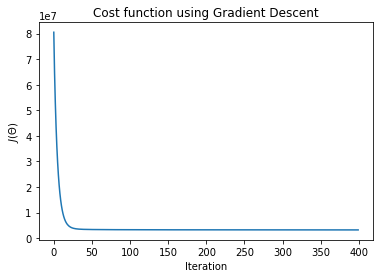

In [44]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [45]:
## حالا می خواهم تعدادی از متغیر های کم اهمیت را از تحلیل حذف کنم:

In [55]:
data2 = pd.DataFrame(data2);
data2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,141,5.0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,...,141,5.0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,173,5.0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,...,145,3.0,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
#### رسم نمودار هر متغیر نسبت به متغیر هدف:

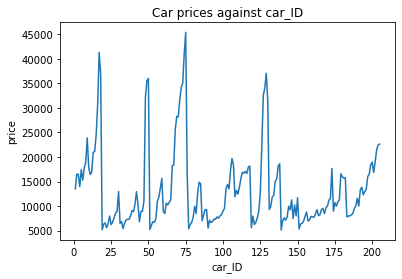

In [75]:
plt.plot(data2.iloc[:,0], data2.iloc[:,25])
plt.xlabel('car_ID')
plt.ylabel('price')
plt.title('Car prices against car_ID')
plt.show()

## This attr doesn't relate to price that much. So, I will remove it from prediction.

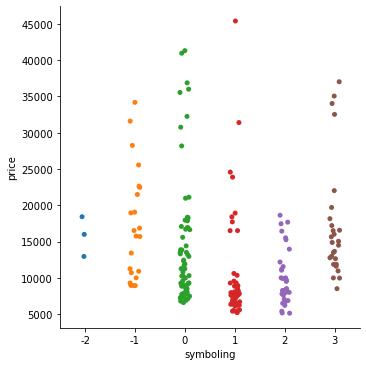

In [91]:
sns.catplot(x="symboling", y="price", data=data2)

## This attr doesn't relate to price that much. So, I will remove it from prediction.

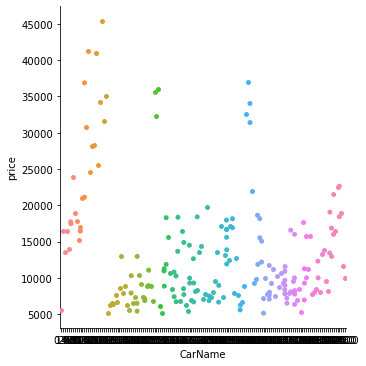

In [92]:
sns.catplot(x="CarName", y="price", data=data2)

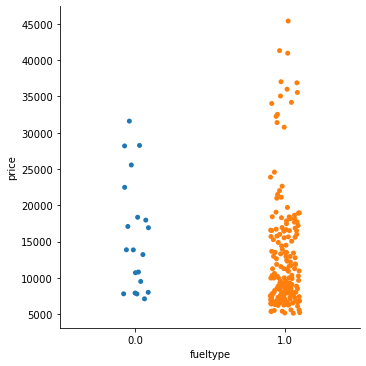

In [93]:
sns.catplot(x="fueltype", y="price", data=data2)

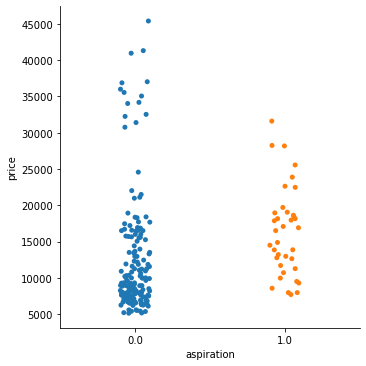

In [94]:
sns.catplot(x="aspiration", y="price", data=data2)

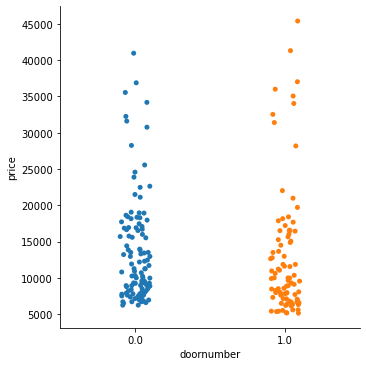

In [95]:
sns.catplot(x="doornumber", y="price", data=data2)

## This attr doesn't relate to price that much. So, I will remove it from prediction.

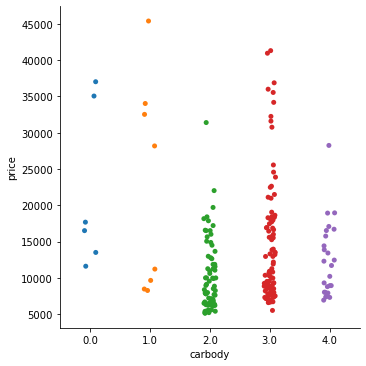

In [96]:
sns.catplot(x="carbody", y="price", data=data2)

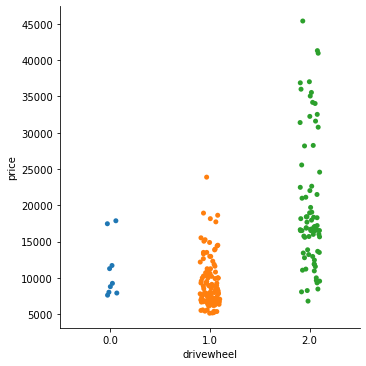

In [87]:
sns.catplot(x="drivewheel", y="price", data=data2)

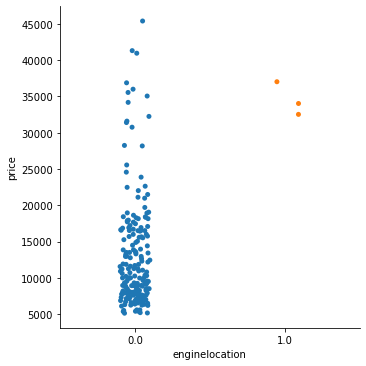

In [89]:
sns.catplot(x="enginelocation", y="price", data=data2)

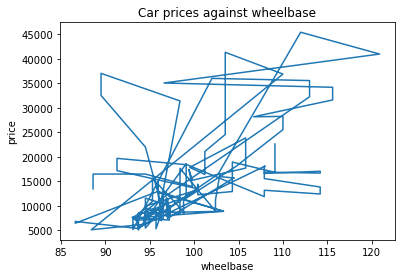

In [90]:
plt.plot(data2.iloc[:,9], data2.iloc[:,25])
plt.xlabel('wheelbase')
plt.ylabel('price')
plt.title('Car prices against wheelbase')
plt.show()

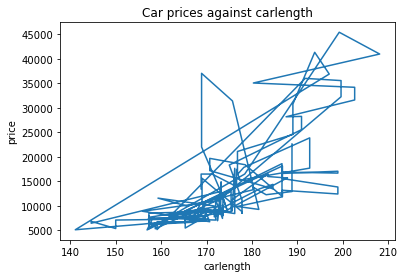

In [97]:
plt.plot(data2.iloc[:,10], data2.iloc[:,25])
plt.xlabel('carlength')
plt.ylabel('price')
plt.title('Car prices against carlength')
plt.show()

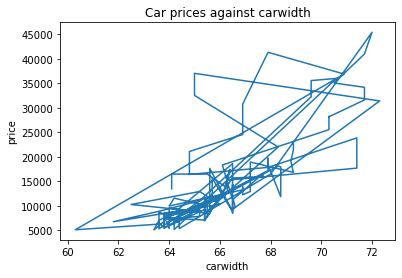

In [98]:
plt.plot(data2.iloc[:,11], data2.iloc[:,25])
plt.xlabel('carwidth')
plt.ylabel('price')
plt.title('Car prices against carwidth')
plt.show()

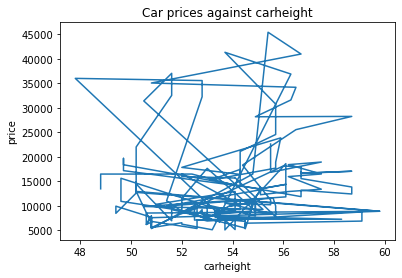

In [99]:
plt.plot(data2.iloc[:,12], data2.iloc[:,25])
plt.xlabel('carheight')
plt.ylabel('price')
plt.title('Car prices against carheight')
plt.show()

## This attr doesn't relate to price that much. So, I will remove it from prediction.

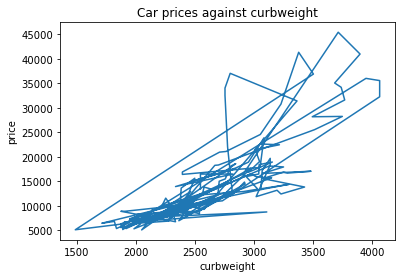

In [100]:
plt.plot(data2.iloc[:,13], data2.iloc[:,25])
plt.xlabel('curbweight')
plt.ylabel('price')
plt.title('Car prices against curbweight')
plt.show()

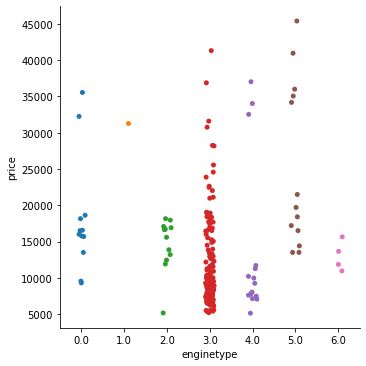

In [102]:
sns.catplot(x="enginetype", y="price", data=data2)

## This attr doesn't relate to price that much. So, I will remove it from prediction.

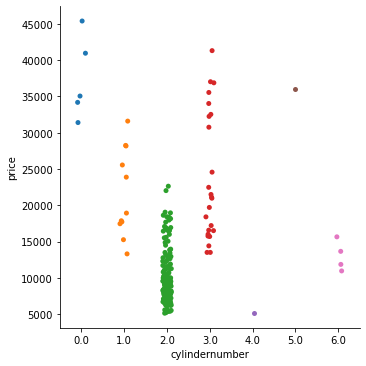

In [103]:
sns.catplot(x="cylindernumber", y="price", data=data2)

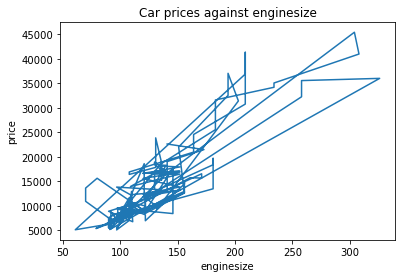

In [104]:
plt.plot(data2.iloc[:,16], data2.iloc[:,25])
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Car prices against enginesize')
plt.show()

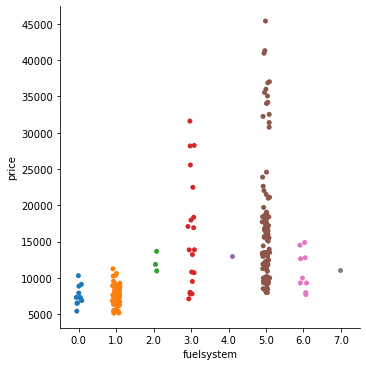

In [105]:
sns.catplot(x="fuelsystem", y="price", data=data2)

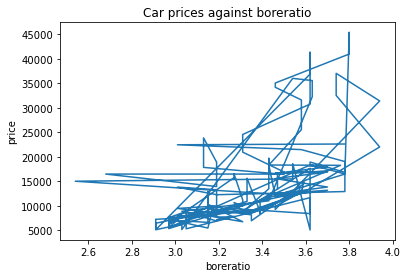

In [106]:
plt.plot(data2.iloc[:,18], data2.iloc[:,25])
plt.xlabel('boreratio')
plt.ylabel('price')
plt.title('Car prices against boreratio')
plt.show()

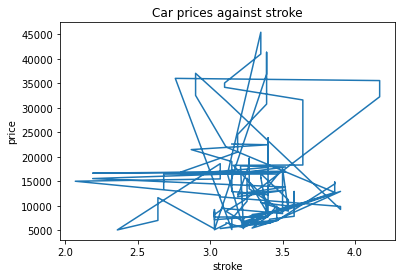

In [107]:
plt.plot(data2.iloc[:,19], data2.iloc[:,25])
plt.xlabel('stroke')
plt.ylabel('price')
plt.title('Car prices against stroke')
plt.show()

## This attr doesn't relate to price that much. So, I will remove it from prediction.

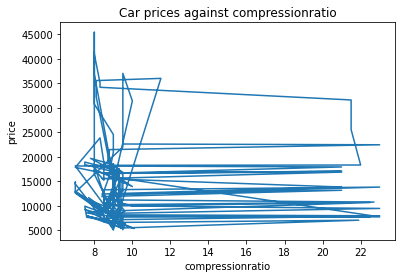

In [108]:
plt.plot(data2.iloc[:,20], data2.iloc[:,25])
plt.xlabel('compressionratio')
plt.ylabel('price')
plt.title('Car prices against compressionratio')
plt.show()

## This attr doesn't relate to price that much. So, I will remove it from prediction.

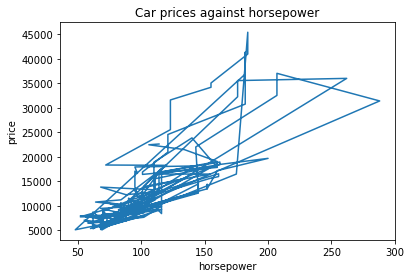

In [109]:
plt.plot(data2.iloc[:,21], data2.iloc[:,25])
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Car prices against horsepower')
plt.show()

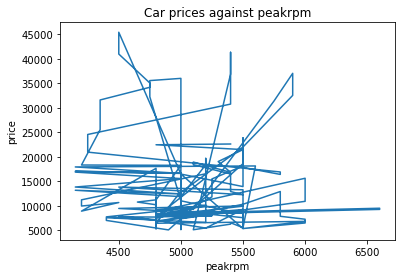

In [110]:
plt.plot(data2.iloc[:,22], data2.iloc[:,25])
plt.xlabel('peakrpm')
plt.ylabel('price')
plt.title('Car prices against peakrpm')
plt.show()

## This attr doesn't relate to price that much. So, I will remove it from prediction.

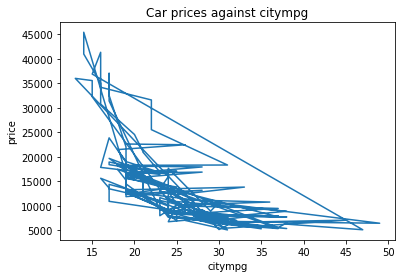

In [111]:
plt.plot(data2.iloc[:,23], data2.iloc[:,25])
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Car prices against citympg')
plt.show()

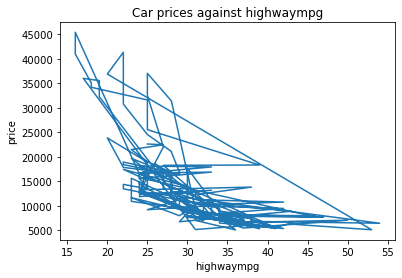

In [112]:
plt.plot(data2.iloc[:,24], data2.iloc[:,25])
plt.xlabel('highwaympg')
plt.ylabel('price')
plt.title('Car prices against highwaympg')
plt.show()

In [114]:
#### حذف متغیر های تشخیص داده شده:

In [115]:
data2.drop(['car_ID', 'symboling', 'doornumber', 'carheight', 'enginetype', 'stroke', 'compressionratio', 'peakrpm'], axis=1)

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2.0,1.0,0.0,0.0,2.0,0.0,88.6,168.8,64.1,2548,2.0,130,5.0,3.47,111,21,27,13495.0
1,3.0,1.0,0.0,0.0,2.0,0.0,88.6,168.8,64.1,2548,2.0,130,5.0,3.47,111,21,27,16500.0
2,1.0,1.0,0.0,2.0,2.0,0.0,94.5,171.2,65.5,2823,3.0,152,5.0,2.68,154,19,26,16500.0
3,4.0,1.0,0.0,3.0,1.0,0.0,99.8,176.6,66.2,2337,2.0,109,5.0,3.19,102,24,30,13950.0
4,5.0,1.0,0.0,3.0,0.0,0.0,99.4,176.6,66.4,2824,1.0,136,5.0,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,2952,2.0,141,5.0,3.78,114,23,28,16845.0
201,138.0,1.0,1.0,3.0,2.0,0.0,109.1,188.8,68.8,3049,2.0,141,5.0,3.78,160,19,25,19045.0
202,140.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,3012,3.0,173,5.0,3.58,134,18,23,21485.0
203,142.0,0.0,1.0,3.0,2.0,0.0,109.1,188.8,68.9,3217,3.0,145,3.0,3.01,106,26,27,22470.0


In [116]:
## overfitting:
## نگه داشتن داده های نامربوط در دیتاست، می تواند باعث ایجاد این اتفاق شود.
## این داده ها با توجه به ایجاد نویز، باعث بروز مشکل در دقت تحلیل و پیشبینی ما میشوند.
## بنابراین خیلی اهمیت دارد که ما داده های نامربوط را قبل از ارزیابی الگوریتم ها حذف کنیم و دیتاست را آماده سازی کنیم.

In [117]:
## روش های انتخاب متغیر ها و کاهش ابعاد:
## 1. Pearson Correlation:
#### در این روش مبتنی بر فیلتر است. با محاسبه ی فرمولش، ارتباط متغیر ها با متغیر هدف را محاسبه می کند. 10 متفیر برتر را حفظ می کند.
## 2. Chi-Squared:
#### این روش هم مبتنی بر فیلتر است. بر اساس فرمولش، تنها یک متغیر که بیشترین مقدار را در فرمول به دست آورده حفظ می کند.
## 3. Recursive Feature Elimination:
#### این روش جز دسته ی روش های wrapper based قرار می گیرد.
#### این دسته، به مسئله ی انتخاب متغیر ها، به عنوان یک مسئله ی سرچ و جستجو نگاه می کنند.
#### The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
## 4. Lasso: SelectFromModel:
#### این روش جز دسته ی روش های embedded قرار می گیرد.
#### این دسته، از یک سری متد های انتخاب متغیر که به صورت built-in داخل آنها تعبیه شده، استفاده می کنند.
## 5. Tree-based: SelectFromModel:
####  این روش جز دسته ی روش های embedded قرار می گیرد.
#### در این روش از یک سری ساختار های درختی و گاها جنگلی استفاده می شود و روی نود های درخت ها کار می شود.

In [120]:
####           ***********     ارزیابی مدل رگرسیون خطی:  ***************

In [ ]:
## برای این بخش چون داده ی تست در اختیار نداشتم و نمی توان مدل را با داده ی یکسان آموزش ارزیابی کرد، نتوانستم بررسی کنم.